# 서론
데이터 분석 주제 : 포켓몬스터 도감

선정 이유 : 포켓몬스터는 애니메이션을 많이들 생각하지만, 실제로 포켓몬스터 원작 게임에서 게임 플레이어들이 하는 실전 배틀에서 사용하는 6가지 포켓몬의 종족값 수치와 다른 특징들이 도감에 잘 드러나 있기 때문에 선정하였다.

데이터 분석 프로그래밍 수업에 걸맞게 통계학적 방법도 사용해 볼 예정이다.

위 작성 파일을 알기 위해, 같이 제출한
Pokemon.csv 파일을 왼쪽에 문서 모양의 파일을 누르고 파일을 삽입해주면
감사할 것 같다.

실습이랑 시험에서 배웠던 것처럼 데이터 셋 파일을 왼쪽 파일 탭을
선택해서 업로드하자,

In [83]:
# 필수로 사용할 것들을 import 해주기
# 데이터
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq install fonts-nanum

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [84]:
file_data = "Pokemon.csv" #csv 파일 불러오기
df_data = pd.read_csv(file_data) #판다스 이용, 데이터 읽어오기
#기존에 #은 도감 번호인데, 행으로 만들어서 헷갈리는 인덱스를 없게 한다.
display(df_data.head())

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#데이터 파악
이제 데이터를 읽어왔으니, 해당 데이터 셋엔 어떤 데이터를 있는지 파악해보자

- #: 도감 번호

- Name : 포켓몬의 이름이다. 해당 데이터셋은 kaggle에서 가져온
데이터 셋이라, 영어로 되어 있다.
Mega라고 쓰여잇는 데이터는 메가진화라는 키워드이다.

- Type 1 : 포켓몬의 고유한 타입이다.
타입은 18가지이다.

- Type 2 : 포켓몬은 진화를 거듭하면서, 2가지 타입을 가질 수 있다.
고유하게 하나의 타입은 포켓몬도 있다.

- Total : 종족값으로 아래 6가지 열들의 값들을 모두 합친 값이다.

- HP : 체력

- Attack : 공격

- Defence : 방어

- Sp. Atk : Sp(Special)의 약자로 특수 공격을 의미

- Sp. Def : 특수 방어

- Speed : 속도

- Generation : 각 게임별로 세대가 주어진다. 1세대부터 처음
출시했던 게임이라고 보면 된다.

- Legendary : 각 세대별로 전설의 포켓몬들이 존재하는데, 전설의 포켓몬인지 아닌지 부울 형태로 나타냈다.




# 데이터 활용
이제 판다스 데이터프레임을 이용해, 필터링이나 함수를 사용해서
통계정보를 출력해보겠다.

In [85]:
#현재 도감 번호와 행 인덱스가 헷갈린다.
#도감 번호를 행 번호로 만들어서 읽어와보자
df = pd.read_csv(file_data, index_col = ["#"])
df_mech = df.copy() #기계 학습 알고리즘 사용할 용 copy
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


여기선, 포켓몬스터중에 전설의 포켓몬이라는 포켓몬들을 출력해보겠다.
그리고 개인적으로 제일 애정하는 타입은 물 타입의 포켓몬을 출력해보겠다.

In [86]:
lengendary_df = df[df['Legendary'] == True]
#Legendary가 True인 포켓몬만 출력되도록 : 전설의 포켓몬을 출력
print(lengendary_df)
#다음인 타입이 Water : 물타입인 포켓몬만 출력
water_df = df[df['Type 1'] == "Water"]
print(water_df)

                    Name    Type 1    Type 2  Total   HP  Attack  Defense  \
#                                                                           
144             Articuno       Ice    Flying    580   90      85      100   
145               Zapdos  Electric    Flying    580   90      90       85   
146              Moltres      Fire    Flying    580   90     100       90   
150               Mewtwo   Psychic       NaN    680  106     110       90   
150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   
..                   ...       ...       ...    ...  ...     ...      ...   
719              Diancie      Rock     Fairy    600   50     100      150   
719  DiancieMega Diancie      Rock     Fairy    700   50     160      110   
720  HoopaHoopa Confined   Psychic     Ghost    600   80     110       60   
720   HoopaHoopa Unbound   Psychic      Dark    680   80     160       60   
721            Volcanion      Fire     Water    600   80     110      120   

내가 제일 좋아하는 포켓몬은 이상해씨(Bulbasaur)를 출력해보자

In [87]:
Bulbasaur = df[df['Name'] == 'Bulbasaur']
print(Bulbasaur)

        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                           
1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
#                                
1     45           1      False  


max와 min 값을 출력하고 범위와 사분범위를 출력해보겠다.

숫자 관련 value여야 하기 때문에 Total열을 이용해서 해보겠다.

그리고 종족값의 평균을 출력해보겠다.


In [88]:
# 종족값의 max 출력
max_total= df['Total'].max()
print('제일 높은 종족값 : ',max)
max_pokemon = df[df['Total'] == max_total]['Name']
print(max_pokemon)

print()
# 종족값의 min 출력
min_total = df['Total'].min()
print('제일 낮은 종족값 : ',min_total)
min_pokemon = df[df['Total'] == min_total]['Name']
print(min_pokemon)

# 범위 출력
range = max_total - min_total
print(range)

#사분범위 출력
q1 = df['Total'].quantile(.25)
print(q1)
q3 = df['Total'].quantile(.75)
print(q3)

iqr = q3 - q1
print(iqr)

제일 높은 종족값 :  780
#
150      MewtwoMega Mewtwo X
150      MewtwoMega Mewtwo Y
384    RayquazaMega Rayquaza
Name: Name, dtype: object

제일 낮은 종족값 :  180
#
191    Sunkern
Name: Name, dtype: object
600
330.0
515.0
185.0


# 누락 데이터 처리
포켓몬들은 단일 타입과 2가지 타입 2가지가 있다.
단일 타입이면 Type 2가 누락이 되는데
해당 데이터들을 처리해보자

단일 타입을 타입이 한 개밖에 없기 때문에 삭제하는 것도 방법이지만
단일 타입들 중 배틀에 사용하기 좋은 포켓몬도 많기 때문에
대체를 해 볼 것이다.

In [89]:
# 현재 데이터 프레임의 정보
df.info()
# 현재 누락 데이터가 있는지 확인하기
print(df.isnull())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB
      Name  Type 1  Type 2  Total     HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                             
1    False   False   False  False  False   False    False    False    False   
2    False   False   False  False  Fal

해당 누락 데이터는 문자열로 저장된 데이터이기 때문에 누락 데이터를 삭제하자


In [90]:
df['Type 2'] = df['Type 2'].fillna("Single")
# 단일 타입을 Single이라는 의미의 Single로 대체한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


# plot 그리기
이제 누락 데이터도 처리했다. 이제는
plot을 그려볼 것이다.
Type의 분포도를 그려볼 것이다.
plot의 형태는 bar 그래프를 이용했다.


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


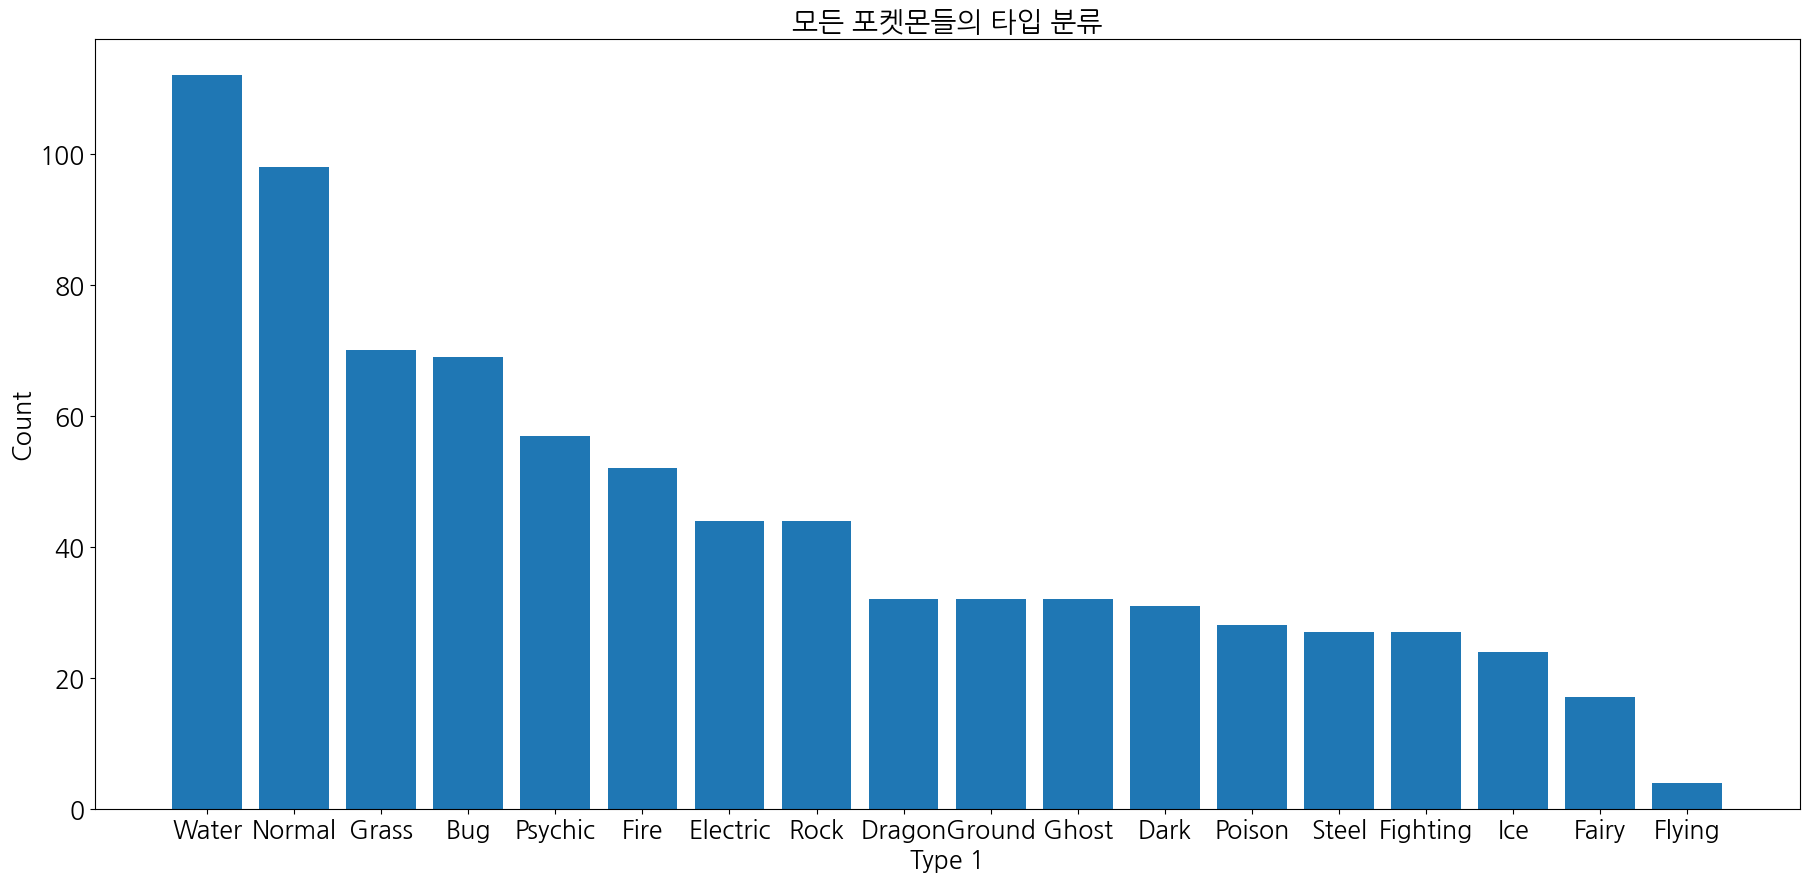

In [91]:
type1_counts = df['Type 1'].value_counts()
# Type 1의 value_counts()를 사용해 key, value 형태로 만든다.
print(type1_counts)

# 막대 그래프 그리기, 타입의 수가 많기 때문에 조정을 해준다.
plt.figure(figsize=(22, 10))
# 타입의 수에 맞게끔 size 조정
plt.bar(type1_counts.index, type1_counts.values)
# 그래프는 bar 형태로 나오게 한다.
plt.title('모든 포켓몬들의 타입 분류', size = 20)
# 어떤 그래프인지에 대한 명시

# key를 x에, value에 count 한 값을 집어 넣는다.
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.show()

이번엔 전설의 포켓몬인 Legendary 열이 True인 값들이 포켓몬들이 어떤 타입을 가지고 있는지 plot를 그려보겠다.

이번엔 기본 그래프를 그려보겠다. 다들 어떤 타입을 갖는지 구해보겠다

이 그래프를 그리기 위해선 아까 위에서 Legendary가 True인 값만 뽑았던 데이터를 가져오겠다.

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: Type 1, dtype: int64


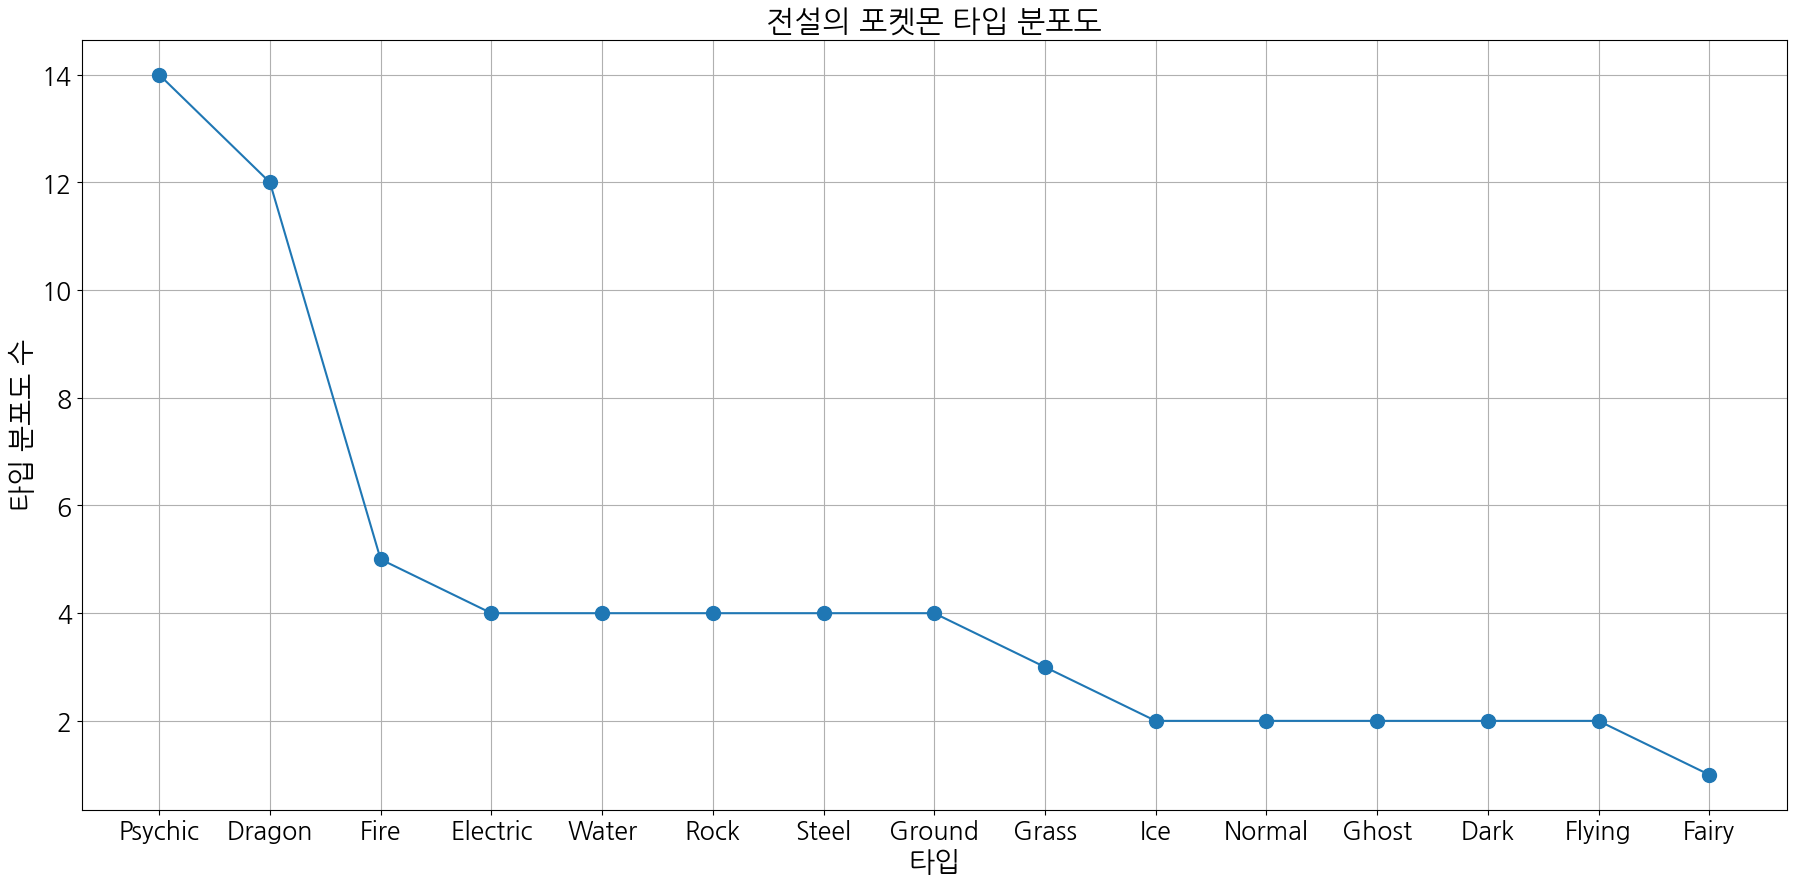

In [92]:
legend_count = lengendary_df['Type 1'].value_counts() #Legendary에 Type 1 count함수 쓰기
print(legend_count)

#똑같이 Matplotlib를 사용하여 그래프 그리기, 이번엔 평범한 그래프 형태로 marker를 달아서 보기 편하게 해줬다.
plt.figure(figsize=(22, 10))
plt.plot(legend_count.index,legend_count.values, marker = 'o', markersize = 10)
plt.title('전설의 포켓몬 타입 분포도')
plt.xlabel('타입',size = 20)
plt.ylabel('타입 분포도 수', size = 20)
# 시각화에 편하게 구분선
plt.grid()
plt.show()

위를 통하여 전설의 포켓몬은 Psychic -> 에스퍼 타입의 포켓몬이 가장 많은 것이 들어났다.
에스퍼는 일본에서 초능력을 해석할 때 만들어진 단어인데
아무래도 전설의 포켓몬이다보니 초능력을 사용하는 포켓몬이 많은 것으로 확인 된다.


#Hitmap 그리기

이제 람다 함수를 적용해 Hitmap을 만들겠다.

포켓몬은 Total(종족값)에 따라 사용할 수 있는 용도가 있다.

게임을 즐기는 사람들은 종족값에 따라 스토리를 깰 때 사용하거나, 실전 배틀에서 사용하거나 그냥 도감을 채우는 용도로 포켓몬을 포획한다.

                      Name   Type 1  Type 2  Total  HP  Attack  Defense  \
#                                                                         
1                Bulbasaur    Grass  Poison    318  45      49       49   
2                  Ivysaur    Grass  Poison    405  60      62       63   
3                 Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4               Charmander     Fire  Single    309  39      52       43   
..                     ...      ...     ...    ...  ..     ...      ...   
719                Diancie     Rock   Fairy    600  50     100      150   
719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  S

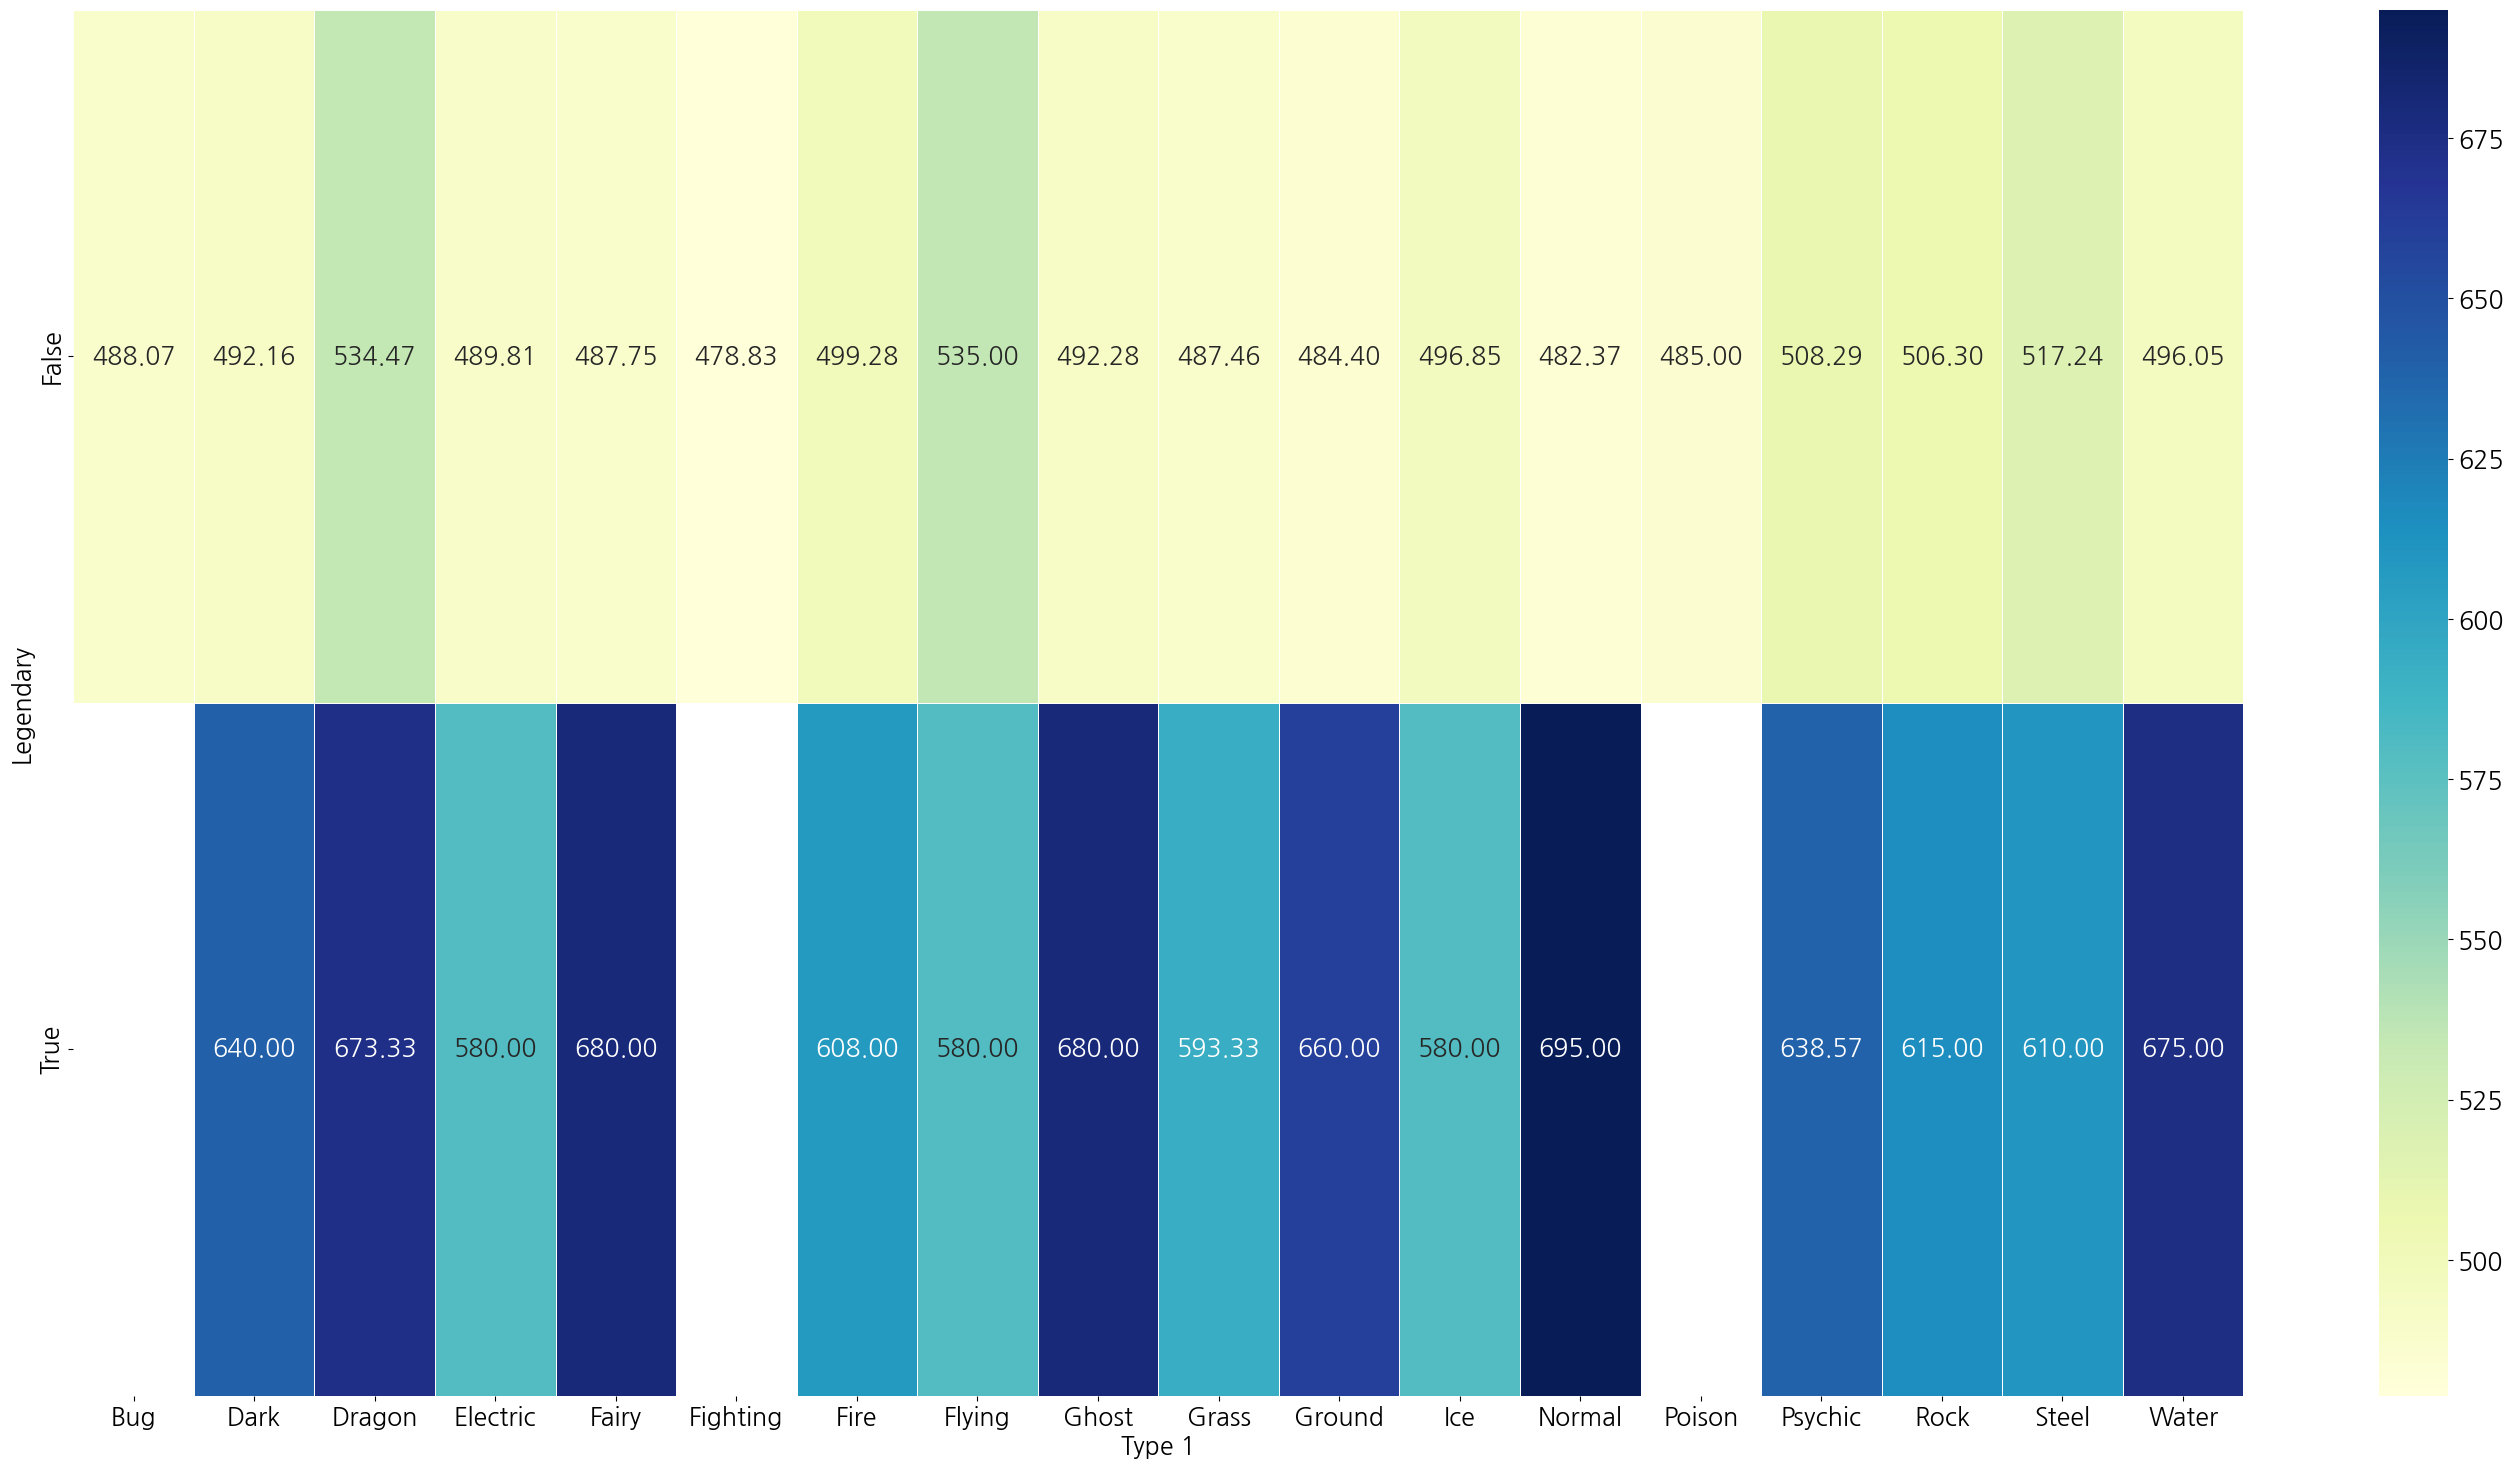

In [93]:
# Total에 대해 500~600이면 실전, 300~400이면 스토리, 100~200이면 관상 그 이하는 귀여움
# 이라는 판단이라는 새로운 열을 생성 Seaborn의 히트맵을 위해 작성한다.
# 실전은 'Battle',  스토리는 'Story', 관상은 'Cute'로 하겠다.
# Division이라는 새로운 열을 만들자
df['Division'] = df['Total'].apply(lambda x : 'Cute' if x <= 200 else 'Story' if x <= 400 else 'Battle')
print(df)

# 이제 배틀용 포켓몬들은 어떤 타입을 가지는가를 Hitmap을 그려보자
df_battle = df[df['Division'] == 'Battle']
print(df_battle)

# Type 1, Legendary별로, Total값의 평균을 집계한 피벗 테이블을 만들기
pivot_df = df_battle.pivot_table(values = 'Total', index = 'Legendary', columns = 'Type 1')

# 피벗 테이블을 바탕으로 히트맵 그리기
plt.figure(figsize = (35,18))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar=True, xticklabels=pivot_df.columns)
plt.show()

이를 통해,
종족값이 높은 것은 Legendary 포켓몬인 것을 확인했다.

배틀의 룰을 전설의 포켓몬을 제한하는게 올바른 배틀 환경을 구축할 수 있겠다라는
결론을 데이터 분석을 통해 알 수 있다는 것이 매우 유익하다


# 통계학적 분석

이제 통계학적 분석을 해보겠다.

통계학적 분석을 위해

가설을 2가지 세우겠다.

귀무가설 : 현재의 상황이 사실이라는 가설
대립가설 : 귀무가설과 대조되는 가설

우리는 귀무가설이 사실을 가정하고 주장하는 것이기 때문에, 귀무가설이 진실일 가능성이 적다고 추정하고, 대립가설이 사실임을 증명하겠다.

통계학적 분석을 하기 위해 두 가지 집단을 추출해서 두 가지 집단의 평균(Mean)에 관련된 가설을 2가지 세우겠다.

내가 좋아하는 타입인 물타입과 두 번째로 좋아하는 불타입 포켓몬의 평균에 관련된 가설을 2가지 세우겠다.
귀무가설 : 물타입과 불타입의 공격(attack)의 평균은 동일하다.
대립가설 : 물타입과 불타입의 공격(attack)의 평균은 차이가 있다.

2가지 그룹을 새로 만들어서, p-value 값을 계산해보겠다.



In [94]:
# t-test를 위한 라이브러리 불러오기
from scipy.stats import ttest_ind

# 데이터프레임에서 2가지 그룹으로 새롭게 추출
fire_attack = df[df['Type 1'] == 'Fire']['Attack']
water_attack = df[df['Type 1'] == 'Water']['Attack']

# 샘플 비교
_, p_value = ttest_ind(fire_attack, water_attack)
print('p-value는 :',p_value)

# 0.05 or 5% 미만이면 대립가설이 채택, 아니면 귀무가설이 채택된다.
if p_value < 0.05:
  print('대립 가설이 채택되었고 분석이 제대로 되었다.')
else:
  print('귀무 가설이 채택되었고 분석이 틀렸다.')

p-value는 : 0.027809591941462368
대립 가설이 채택되었고 분석이 제대로 되었다.


# 데이터 인코딩

데이터 전처리에 인코딩을 해보겠다.

내가 고른 데이터셋은 범주형 데이터가 많다.
그중 Type 1에 대해 인코딩을 해보겠다.
인코딩은 사이킷런을 사용할 것이다.

In [95]:
# 사이킷런 라이브러리 불러오기
# 인코딩은 Label Encoding을 쓸 것이다.
# Type 1은 범주형이며 순서가 없기 때문이다.
from sklearn.preprocessing import LabelEncoder

df['Type 1_Label_Encoding'] = LabelEncoder().fit_transform(df['Type 1'])
print(df)

                      Name   Type 1  Type 2  Total  HP  Attack  Defense  \
#                                                                         
1                Bulbasaur    Grass  Poison    318  45      49       49   
2                  Ivysaur    Grass  Poison    405  60      62       63   
3                 Venusaur    Grass  Poison    525  80      82       83   
3    VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4               Charmander     Fire  Single    309  39      52       43   
..                     ...      ...     ...    ...  ..     ...      ...   
719                Diancie     Rock   Fairy    600  50     100      150   
719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  S

이것을 시각화 해보겠다.
이번엔 count를 따로 만들지 않고
열의 value를 count를 자동으로 해주는 seaborn에 Countplot 그래프를 그리겠다.

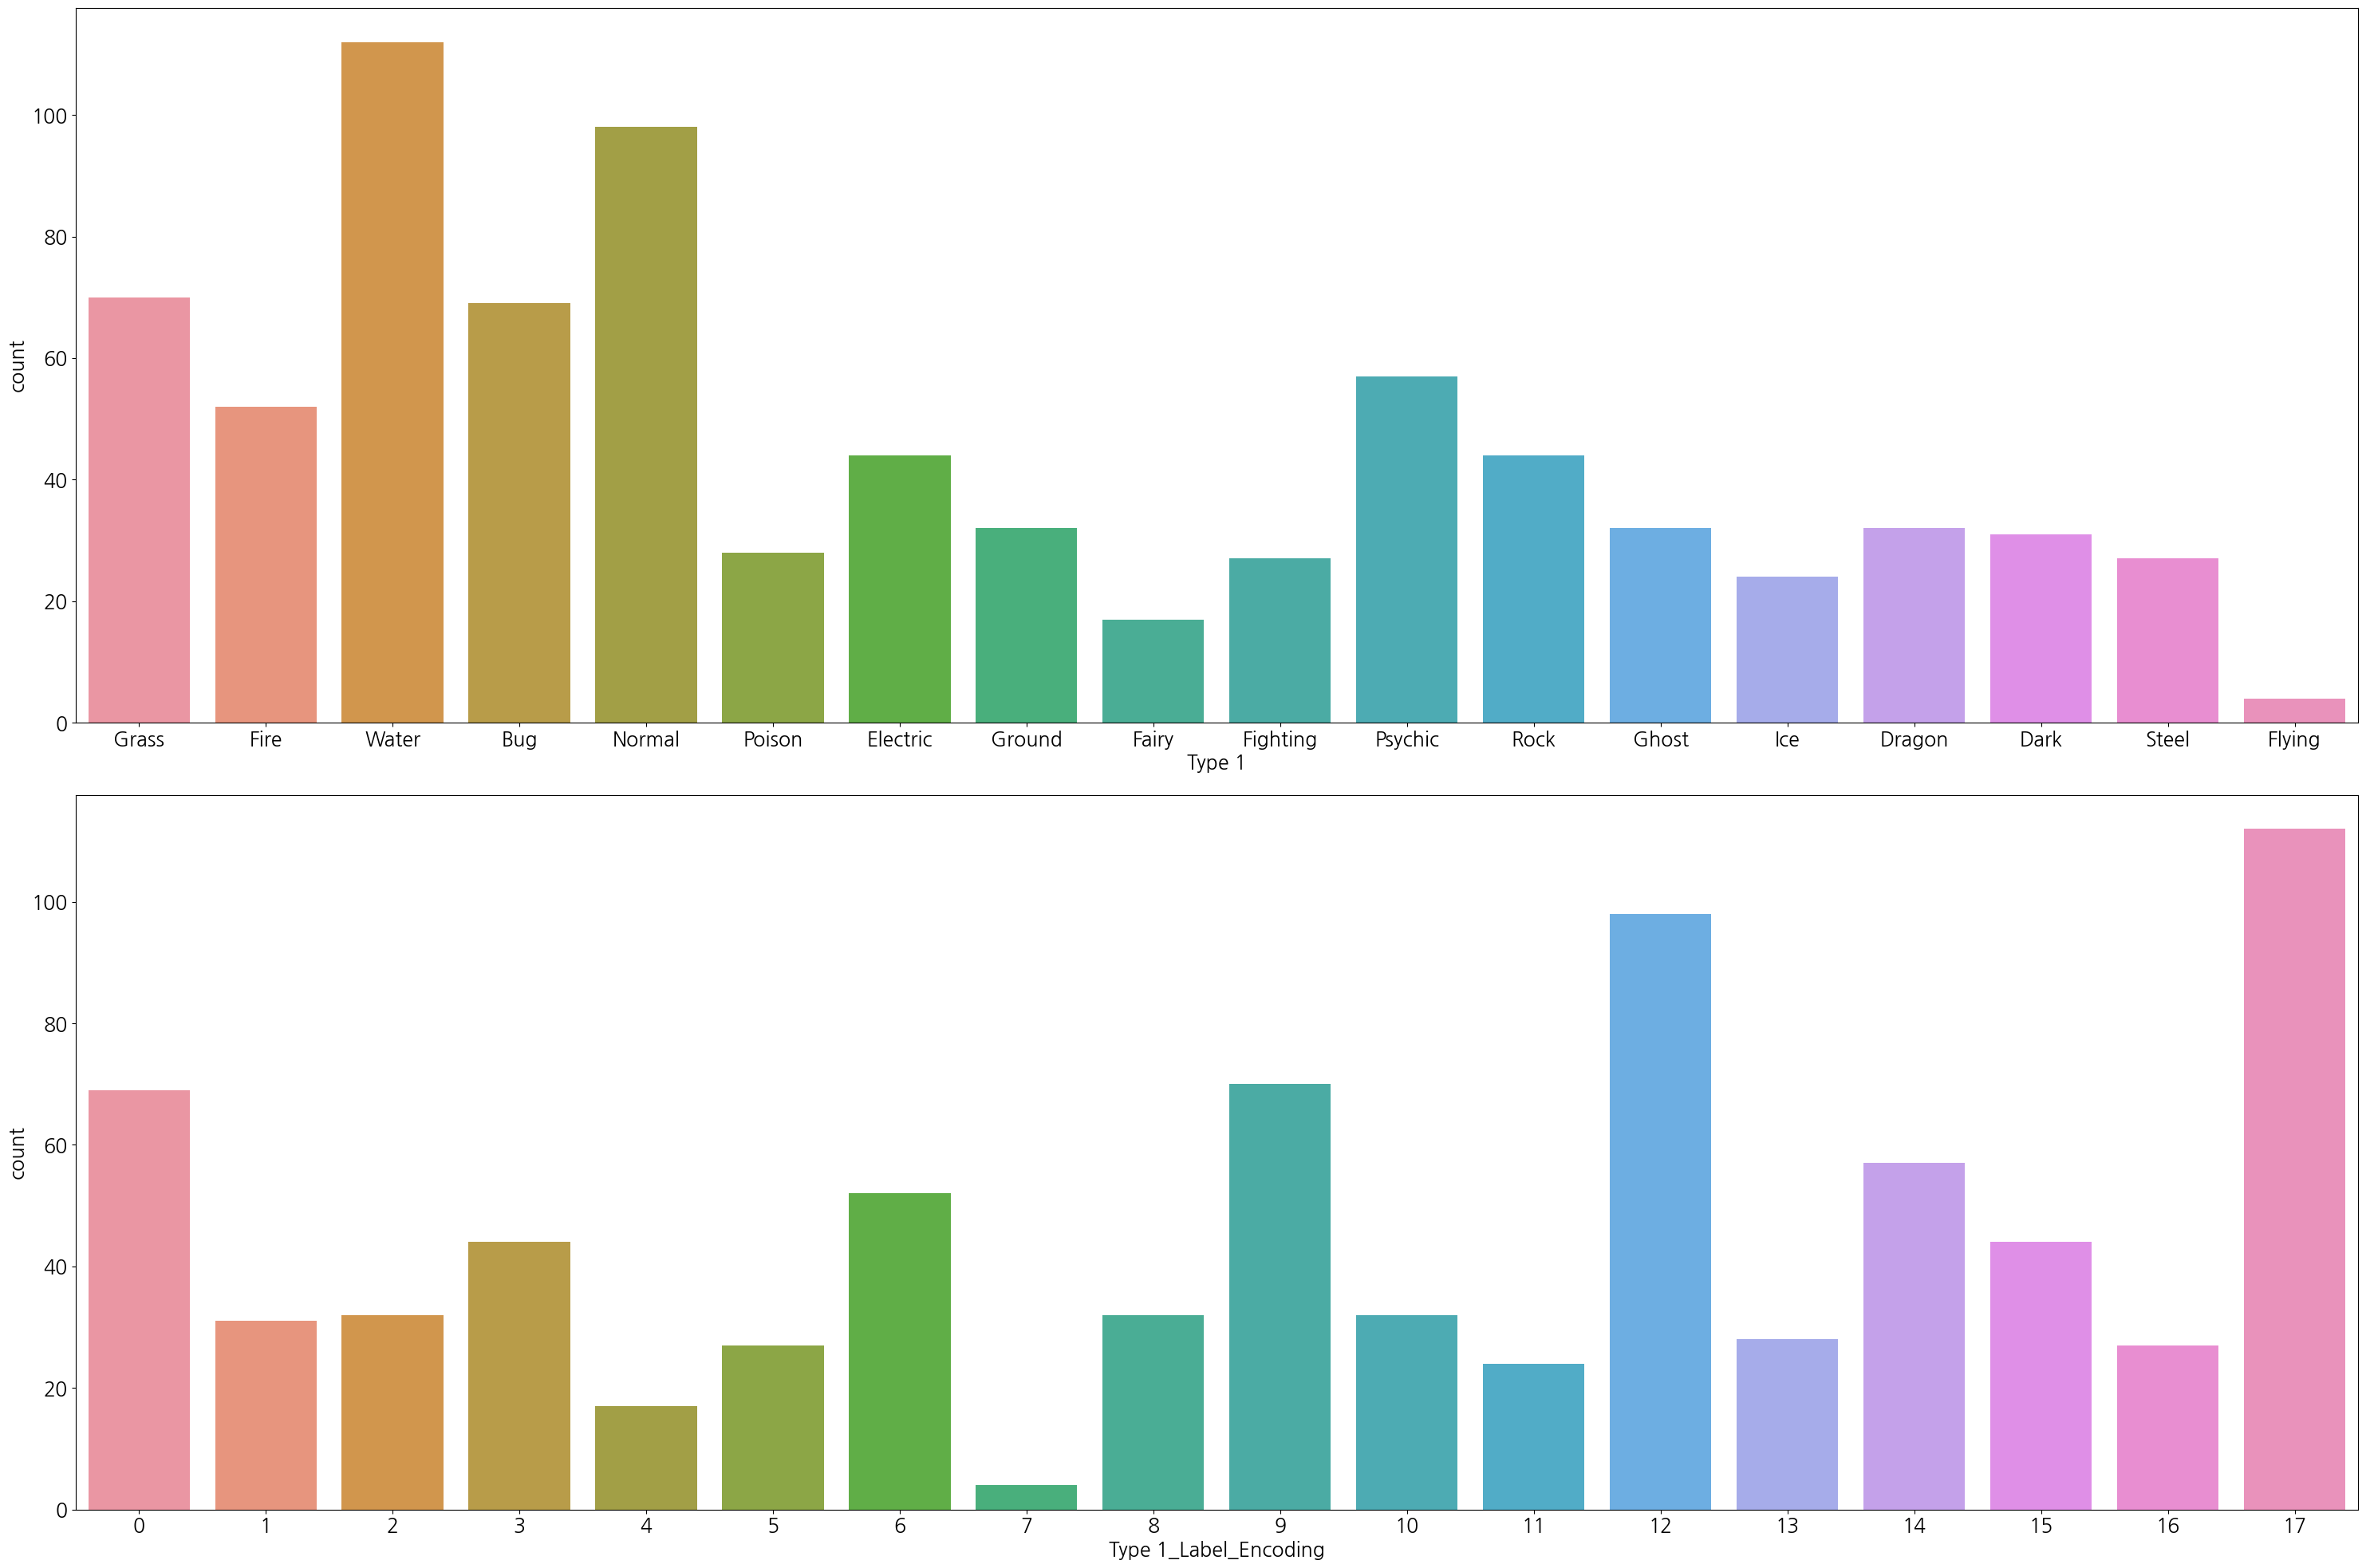

In [96]:
# Figure 생성, 2개의 plot를 그리고 비교할 것이기 때문에 2개의 부분으로 나누어준다.
fig, ax = plt.subplots(2, 1, figsize=(30, 20))

# 원본 'Type 1' 컬럼 countplot
sns.countplot(data=df, x='Type 1', ax=ax[0])

# 레이블 인코딩된 'Type 1_Label_Encoding' 컬럼 countplot
sns.countplot(data=df, x='Type 1_Label_Encoding', ax=ax[1])

plt.tight_layout()
plt.show()


# 클러스터링

기계학습의 클러스터링을 해볼것이다.

간단한 K-Means Clustering을 해보겠다.
K값은 5로 설정하고 포켓몬 배틀에서 중요한 공격과 스피드를
기준으로
클러스터링 하고


클러스터링은 결과를 간단하게 plot으로 나타내보고
계산된 Centroid도 중요하다고 표시하고 싶으니
빨간색 별로 표시하겠다.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


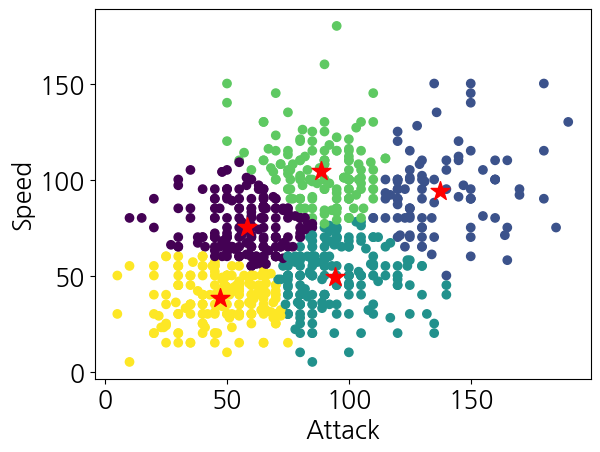

In [97]:
#KMeans 라이브러리를 사이킷런을 통해 불러오기
from sklearn.cluster import KMeans

# 'Attack'과 'Speed' 특성만 선택
X = df[['Attack', 'Speed']]

# KMeans 클러스터링
kmeans = KMeans(n_clusters=5)
# 모델 학습
kmeans.fit(X)

# 클러스터링 결과 레이블
y = kmeans.labels_

# 결과 시각화
plt.scatter(X['Attack'], X['Speed'], c=y)

# 클러스터 중심점(centroid) 시각화
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')

plt.xlabel('Attack')
plt.ylabel('Speed')
plt.show()

이상으로 프로젝트를 마치겠다.

한 학기 동안 정말 고생많으셨습니다. 덕분에 데이터분석에 대해 잘 배울 수 있었습니다.

감사합니다.